# How to modify the atomic masses
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys, os
home_directory = os.path.join("..","..","..")
examples_directory = os.path.join(home_directory,'Examples')
sys.path.insert(0, home_directory)
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateDFTPermittivityObject


## Define the materials to be used.
Create a material using different types of mass definition:
- Average (The mass of the element averaged over its isotope abundance)
- Program (The mass used by the program)
- Isotope (The mass of the most common isotope)
- Perverse (One oxygen is mass 17 the other is 18)

In [2]:
ZnO = {}
zno_outcar = os.path.join(examples_directory,'Vasp','ZnO','OUTCAR')
for definition in ['Average','Program','Isotope']:
    ZnO[definition] = getMaterial(zno_outcar,mass_definition=definition)
    cell = ZnO[definition].getCell()
    print()
    print('Masses for mass_definition ',definition)
    print(cell.get_atomic_masses())
    print('Frequencies (cm-1)')
    print(ZnO[definition].getFrequencies())
masses=ZnO['Average'].getCell().get_atomic_masses()
masses[2:4] = [17.0, 18.0]
ZnO['Perverse'] = getMaterial(zno_outcar,mass_definition=masses)
print()
print('Masses for mass definition ', 'Perverse')
print(masses)
print('Frequencies (cm-1)')
print(ZnO['Perverse'].getFrequencies())


Masses for mass_definition  Average
[65.38, 65.38, 15.9994, 15.9994]
Frequencies (cm-1)
[3.10576726e-06 4.30587663e-06 7.30695764e-06 9.12470932e+01
 9.12470932e+01 2.46103746e+02 3.49991043e+02 3.72089654e+02
 3.72089654e+02 4.02064490e+02 4.02064490e+02 5.08221172e+02]

Masses for mass_definition  Program
[65.39, 65.39, 16.0, 16.0]
Frequencies (cm-1)
[-9.67964625e-06 -7.70368006e-06 -3.26084175e-06  9.12408480e+01
  9.12408480e+01  2.46085122e+02  3.49980467e+02  3.72078444e+02
  3.72078444e+02  4.02053725e+02  4.02053725e+02  5.08211241e+02]

Masses for mass_definition  Isotope
[63.9291461, 63.9291461, 15.9949146223, 15.9949146223]
Frequencies (cm-1)
[-4.87522204e-06 -4.35569169e-06  4.39977694e-06  9.21331357e+01
  9.21331357e+01  2.48842234e+02  3.50818475e+02  3.72962917e+02
  3.72962917e+02  4.02747447e+02  4.02747447e+02  5.08371012e+02]

Masses for mass definition  Perverse
[65.38, 65.38, 17.0, 18.0]
Frequencies (cm-1)
[-6.42528244e-06 -4.44457231e-06  7.17451841e-06  9.12405

## Calculate the absorption using effective medium theory


In [3]:
matrix = getMaterial('ptfe')
frequencies = np.arange(400,500,0.1)
definitions = ZnO.keys()
absorptions = []
for definition in definitions:
    absorption,permittivity = (calculatePowderSpectrum(frequencies,ZnO[definition],matrix,0.1))
    absorptions.append(absorption)

## Plot the absorption coefficents

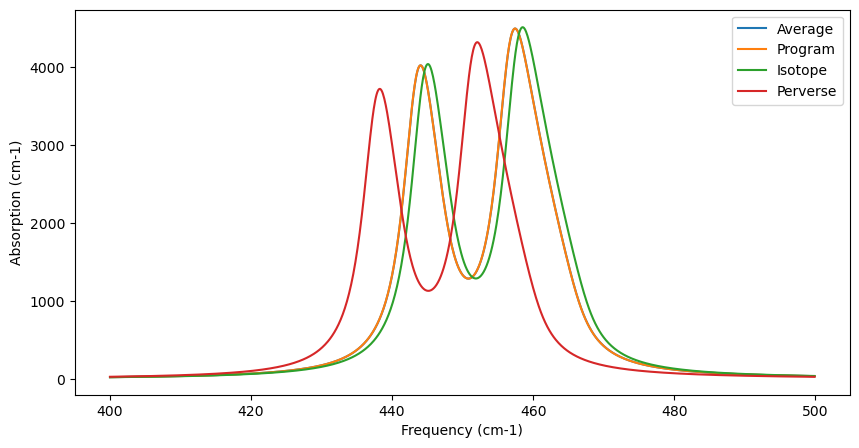

(<matplotlib.legend.Legend at 0x7bcebc824350>, None)

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
for definition,absorption in zip(definitions,absorptions):
    plt.plot(frequencies, absorption,label=definition)
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Absorption (cm-1)')
plt.legend(), plt.show()